In [118]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Country-data (1).csv')
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [36]:
df.country.nunique()

167

In [47]:
# socio-economic factors
X1 = df.iloc[:, [2,4,5,6,9]].values
# health factors
X2 = df.iloc[:, [1,3,7,8]].values

In [48]:
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X2 = sc.fit_transform(X2)

In [53]:
pca = PCA(n_components = 1)
X_soc = pca.fit_transform(X1)
X_hlt = pca.fit_transform(X2)

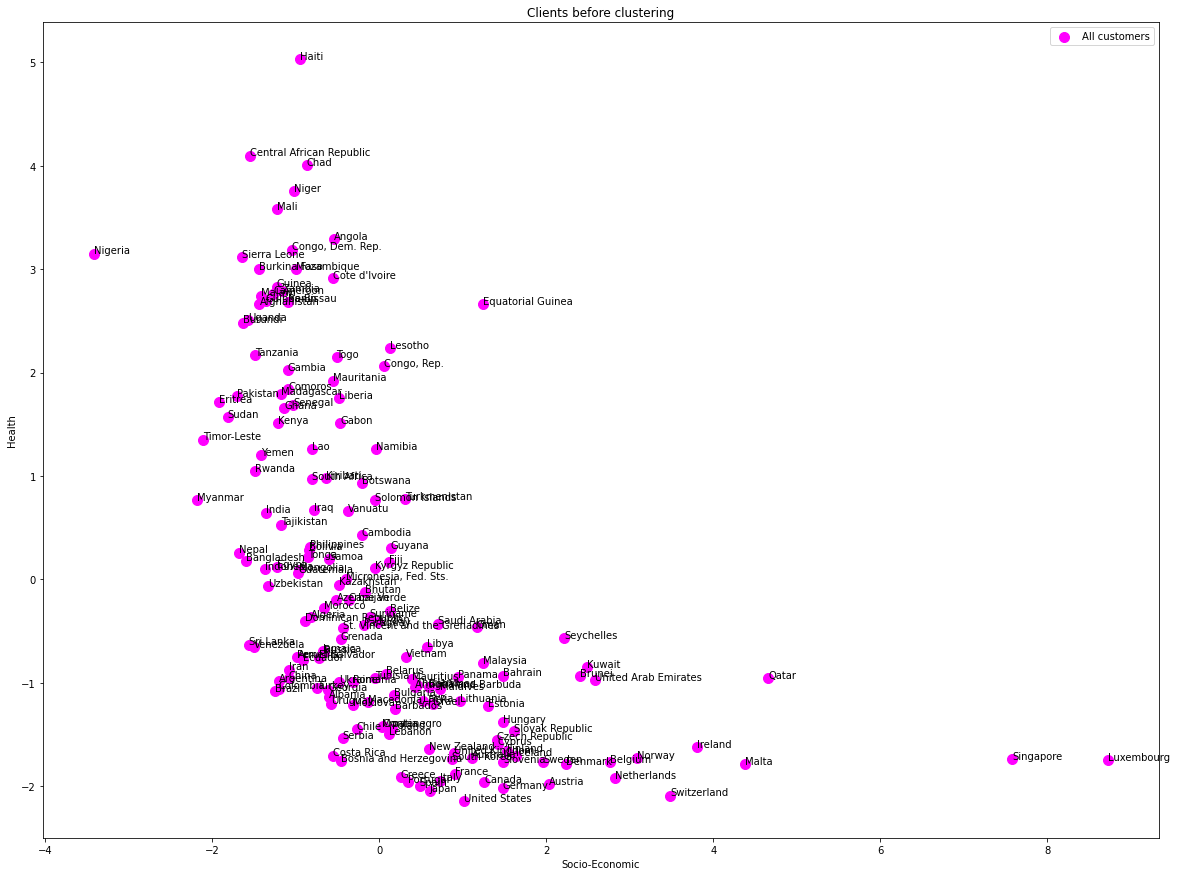

In [73]:
fig = plt.figure(figsize = (20,15))
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (X_soc[i], X_hlt[i]))
plt.scatter(X_soc,X_hlt,s=100,c='magenta',label='All customers')
plt.title('Countries before clustering')
plt.xlabel('Socio-Economic')
plt.ylabel('Health')
plt.legend()
plt.show()

## As we can see from graph health of developed countries looks worse than most of other countries and we can assume that this index works vice versa. 

In [74]:
X_hlt = X_hlt*-1

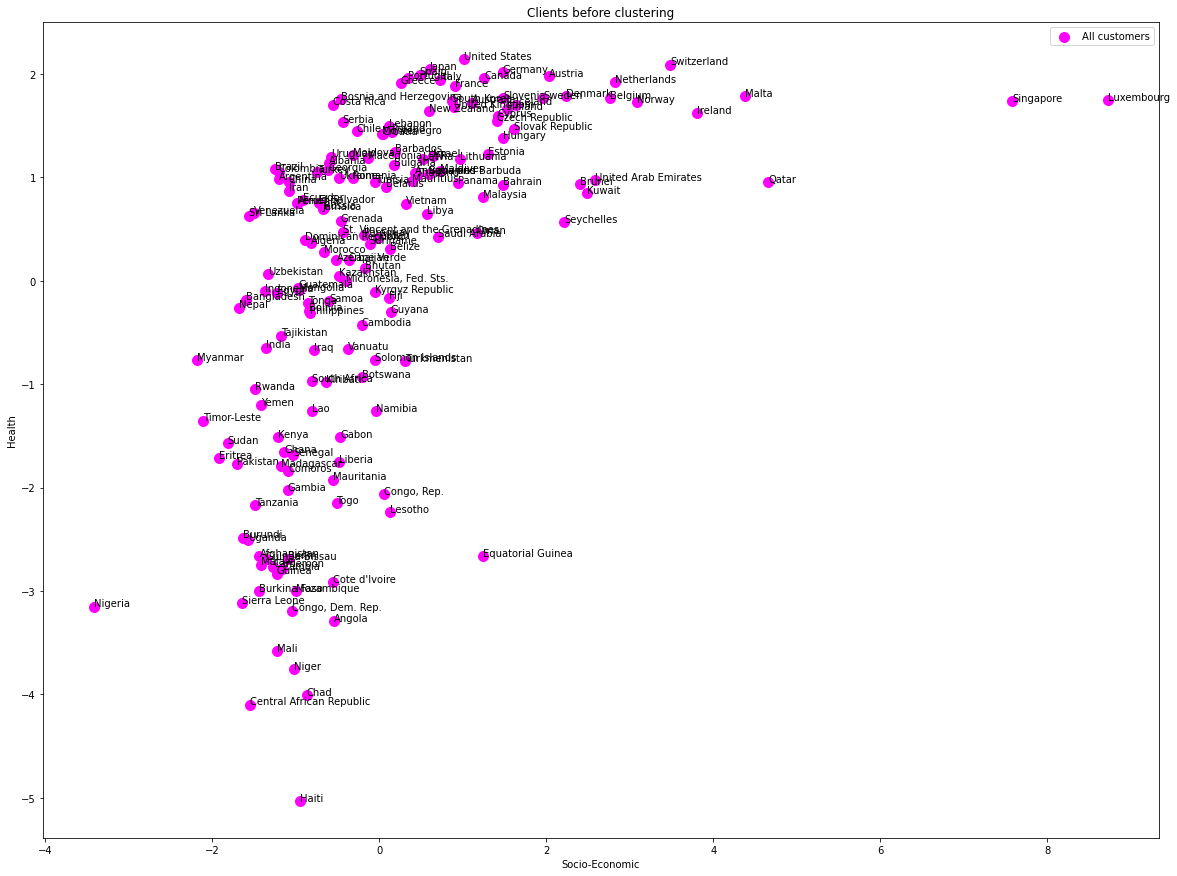

In [75]:
fig = plt.figure(figsize = (20,15))
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (X_soc[i], X_hlt[i]))
plt.scatter(X_soc,X_hlt,s=100,c='magenta',label='All customers')
plt.title('Countries before clustering')
plt.xlabel('Socio-Economic')
plt.ylabel('Health')
plt.legend()
plt.show()

In [79]:
X = np.concatenate((X_soc,X_hlt),axis=1)
X

array([[-1.43269365e+00, -2.65964011e+00],
       [-6.01562109e-01,  1.13452666e+00],
       [-8.20958082e-01,  3.65969887e-01],
       [-5.46098171e-01, -3.29476725e+00],
       [ 4.33169582e-01,  1.04375673e+00],
       [-1.20177123e+00,  9.81312180e-01],
       [-9.71263647e-01,  7.52107187e-01],
       [ 1.10781507e+00,  1.72214901e+00],
       [ 2.02923036e+00,  1.97789199e+00],
       [-5.10558869e-01,  2.03206048e-01],
       [ 5.91694457e-01,  1.03612701e+00],
       [ 1.48488594e+00,  9.29830298e-01],
       [-1.59475974e+00, -1.82574199e-01],
       [ 1.89826741e-01,  1.24967417e+00],
       [ 8.71135914e-02,  9.10768599e-01],
       [ 2.76507159e+00,  1.76759283e+00],
       [ 1.26889004e-01,  3.05293115e-01],
       [-1.09670805e+00, -2.68754264e+00],
       [-1.72230452e-01,  1.25409811e-01],
       [-8.45485355e-01, -2.89304361e-01],
       [-4.53895433e-01,  1.76017646e+00],
       [-2.02287589e-01, -9.28061339e-01],
       [-1.24721842e+00,  1.07785398e+00],
       [ 2.

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


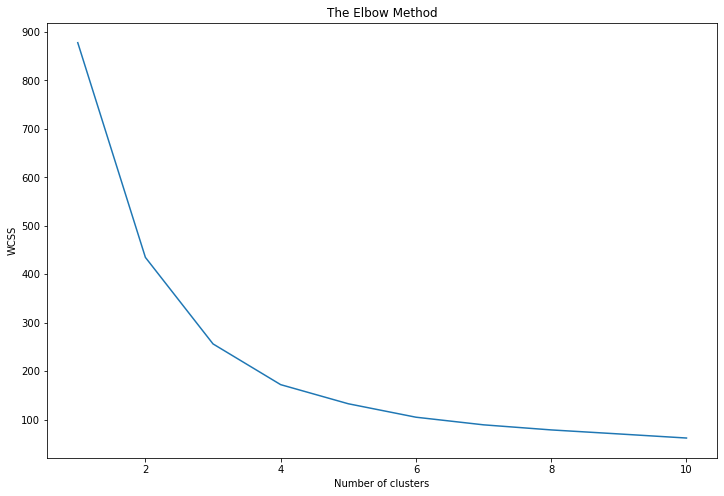

In [80]:
fig = plt.figure(figsize = (12,8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.47038972289051434
For n_clusters = 3 The average silhouette_score is : 0.461689181748552
For n_clusters = 4 The average silhouette_score is : 0.45191097040615213
For n_clusters = 5 The average silhouette_score is : 0.4417934501301186
For n_clusters = 6 The average silhouette_score is : 0.404959405721431
For n_clusters = 7 The average silhouette_score is : 0.372405831572901
For n_clusters = 8 The average silhouette_score is : 0.35497972530444355


In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [83]:
y_kmeans

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [84]:
kmeans.cluster_centers_

array([[ 2.20450931,  1.52625632],
       [-0.39369672,  0.59274605],
       [-1.11075057, -2.33034048]])

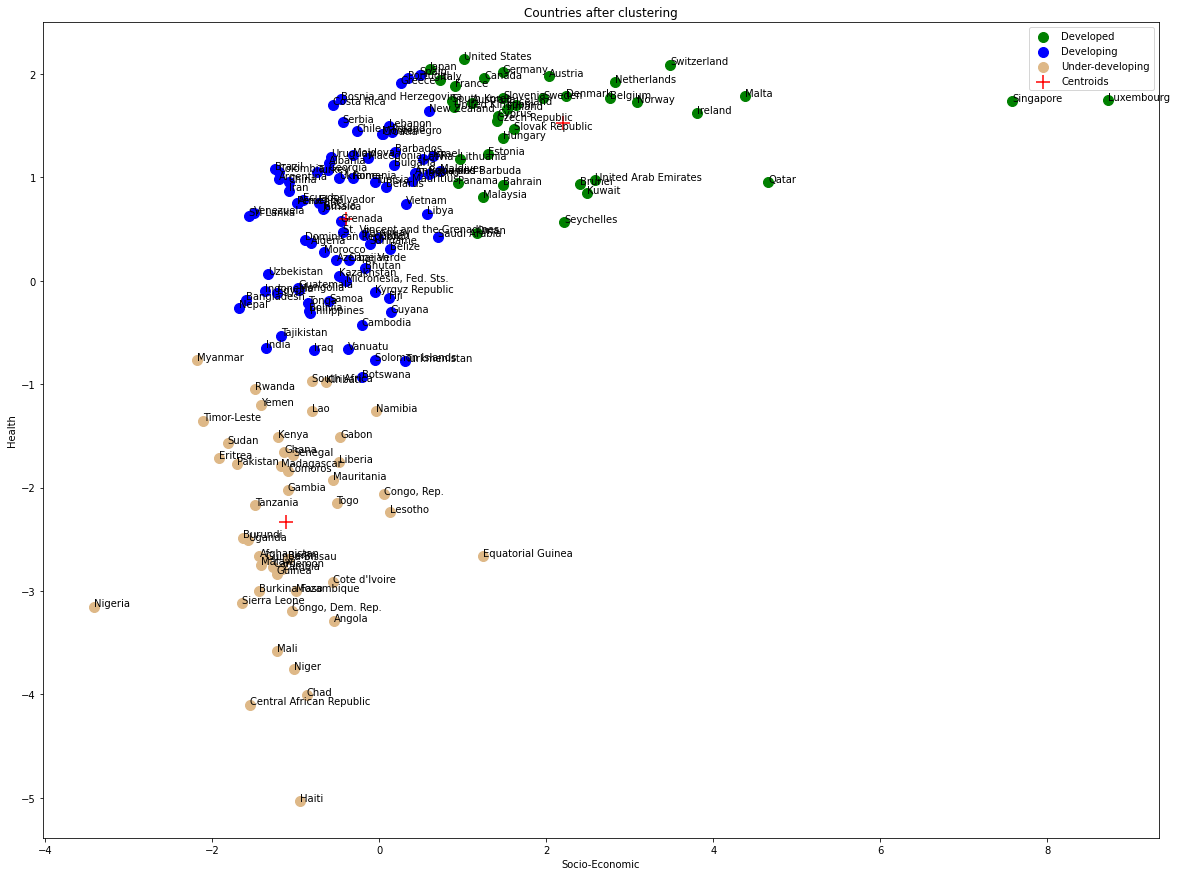

In [87]:
fig = plt.figure(figsize = (20,15))
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (X_soc[i], X_hlt[i]))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='green',label='Developed')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Developing')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='burlywood',label='Under-developing')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Countries after clustering')
plt.xlabel('Socio-Economic')
plt.ylabel('Health')
plt.legend()
plt.show()

# Hierarchical

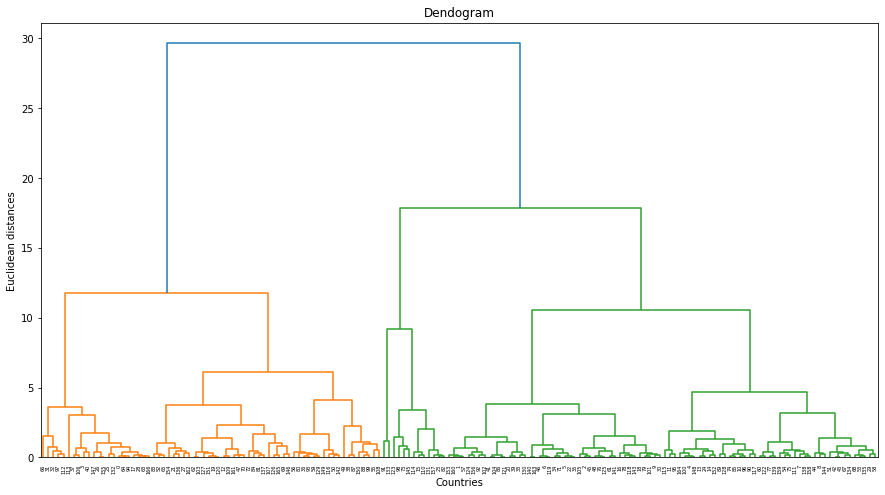

In [89]:
fig = plt.figure(figsize = (15,8))
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [91]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [98]:
y_hc
# 0 & 2 classes is not similar with k_means and need to correcting

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2], dtype=int64)

In [96]:
y_hc = np.where(y_hc == 0, 3, y_hc)
y_hc = np.where(y_hc == 2, 0, y_hc)
y_hc = np.where(y_hc == 3, 2, y_hc)
y_hc

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2], dtype=int64)

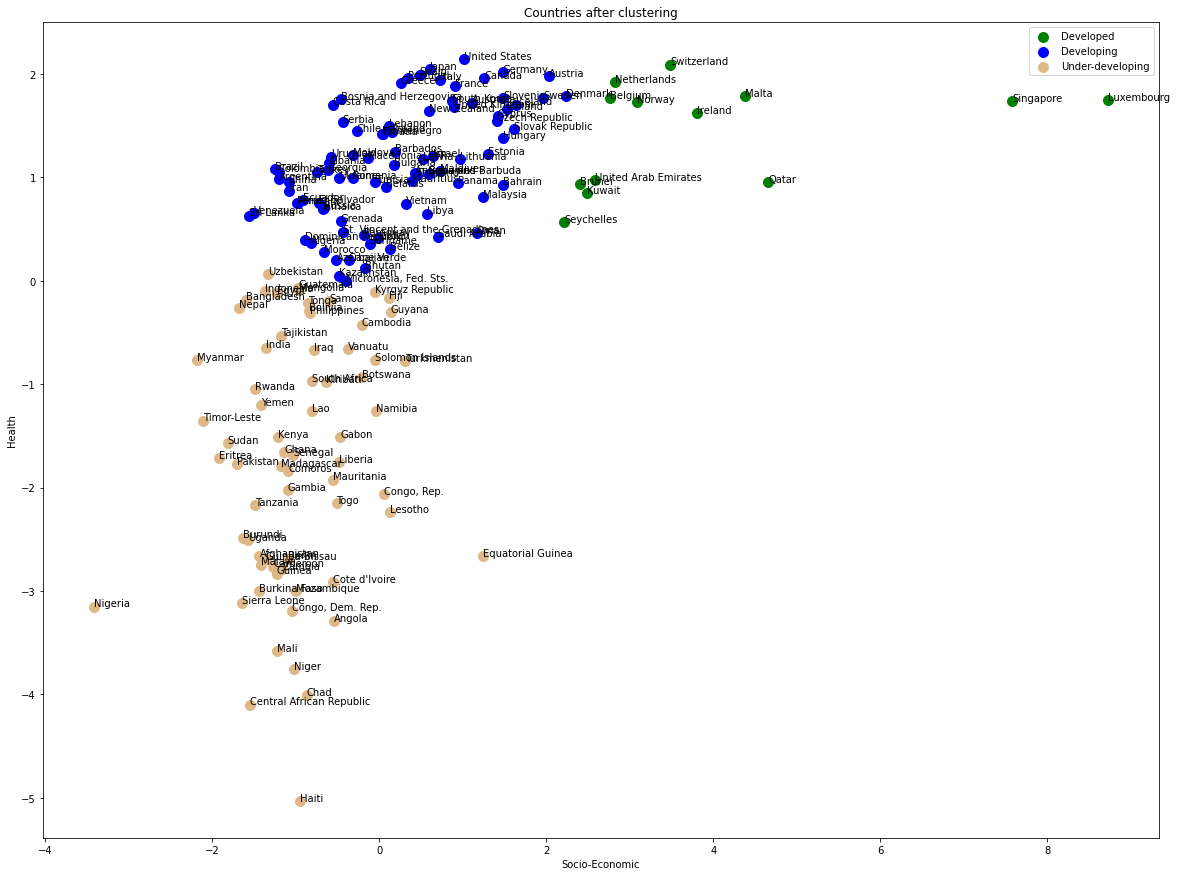

In [99]:
fig = plt.figure(figsize = (20,15))
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (X_soc[i], X_hlt[i]))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green',label='Developed')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Developing')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='burlywood',label='Under-developing')
plt.title('Countries after clustering')
plt.xlabel('Socio-Economic')
plt.ylabel('Health')
plt.legend()
plt.show()

In [109]:
df[(df['country'] == 'Switzerland') | (df['country'] == 'United States')]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
145,Switzerland,4.5,64.0,11.5,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400


## Conclusion

In [116]:
Con = df[['country']]
Con['k-means'] = y_kmeans
Con['hierachical'] = y_hc
Con.replace(0, 'Developed',inplace=True)
Con.replace(1, 'Developing',inplace=True)
Con.replace(2, 'Under-developing',inplace=True)
Con

C:\Users\dell\AppData\Local\Temp/ipykernel_360/931930134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Con['k-means'] = y_kmeans
C:\Users\dell\AppData\Local\Temp/ipykernel_360/931930134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Con['hierachical'] = y_hc
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,country,k-means,hierachical
0,Afghanistan,Under-developing,Under-developing
1,Albania,Developing,Developing
2,Algeria,Developing,Developing
3,Angola,Under-developing,Under-developing
4,Antigua and Barbuda,Developing,Developing
...,...,...,...
162,Vanuatu,Developing,Under-developing
163,Venezuela,Developing,Developing
164,Vietnam,Developing,Developing
165,Yemen,Under-developing,Under-developing


In [117]:
Con[Con['k-means'] != Con['hierachical']]

,country,k-means,hierachical
7,Australia,Developed,Developing
8,Austria,Developed,Developing
11,Bahrain,Developed,Developing
12,Bangladesh,Developing,Under-developing
19,Bolivia,Developing,Under-developing
21,Botswana,Developing,Under-developing
27,Cambodia,Developing,Under-developing
29,Canada,Developed,Developing
42,Cyprus,Developed,Developing
43,Czech Republic,Developed,Developing


## From table above  we can see that hierarchical clustering more corresponds to reality than K-means clustering.